In [1]:
# synth_occlusions.py
import os
import random
from PIL import Image, ImageDraw, ImageOps
from pathlib import Path
import numpy as np

random.seed(42)

def random_rect_mask(img_size, max_frac=0.5):
    w, h = img_size
    rw = random.randint(int(0.1*w), int(max_frac*w))
    rh = random.randint(int(0.08*h), int(max_frac*h))
    x0 = random.randint(0, w-rw)
    y0 = random.randint(0, h-rh)
    return (x0, y0, x0+rw, y0+rh)

def random_ellipse_mask(img_size, max_frac=0.5):
    x0,y0,x1,y1 = random_rect_mask(img_size, max_frac)
    return (x0,y0,x1,y1), 'ellipse'

def apply_mask_to_image(img, mask_type='rect', color=(0,0,0)):
    img = img.convert('RGB')
    w,h = img.size
    draw = ImageDraw.Draw(img)
    if mask_type == 'rect':
        rect = random_rect_mask((w,h))
        draw.rectangle(rect, fill=color)
    elif mask_type == 'ellipse':
        rect, _ = random_ellipse_mask((w,h))
        draw.ellipse(rect, fill=color)
    elif mask_type == 'bottom_mask':
        # simulate masks/beard: block lower part
        draw.rectangle((0,int(h*0.55), w, h), fill=color)
    return img

def overlay_mask_png(img, mask_png_path):
    mask = Image.open(mask_png_path).convert('RGBA')
    mask = mask.resize(img.size)
    img = img.convert('RGBA')
    combined = Image.alpha_composite(img, mask)
    return combined.convert('RGB')

def create_synth_pairs(clean_dir, out_clean_dir, out_occ_dir, mask_pngs=None, per_image=3, size=(256,256)):
    Path(out_clean_dir).mkdir(parents=True, exist_ok=True)
    Path(out_occ_dir).mkdir(parents=True, exist_ok=True)
    for root, _, files in os.walk(clean_dir):
        for fname in files:
            if not fname.lower().endswith(('.jpg','.jpeg','.png')):
                continue
            fpath = os.path.join(root, fname)
            try:
                img = Image.open(fpath).convert('RGB')
            except Exception as e:
                print("skip", fpath, e); continue
            img = ImageOps.fit(img, size)
            base = Path(fname).stem
            # save clean copy
            clean_out = os.path.join(out_clean_dir, f"{base}.png")
            img.save(clean_out)
            # generate occlusions
            for i in range(per_image):
                mode = random.choice(['rect','ellipse','bottom_mask','mask_png'] if mask_pngs else ['rect','ellipse','bottom_mask'])
                if mode == 'mask_png' and mask_pngs:
                    mask_path = random.choice(mask_pngs)
                    occ = overlay_mask_png(img, mask_path)
                else:
                    occ = apply_mask_to_image(img.copy(), mode)
                occ_out = os.path.join(out_occ_dir, f"{base}_occ_{i}.png")
                occ.save(occ_out)
    print("Done creating synthetic pairs.")

# Example usage:
if __name__ == "__main__":
    clean_dir = "E:/Biometrics/dataset/face_data"
    out_clean = "E:/Biometrics/dataset/paired/clean"
    out_occ = "E:/Biometrics/dataset/paired/occluded"
    # if you have PNG mask overlays (transparent backgrounds), list them:
    mask_pngs = []  # e.g. ["masks/sunglasses1.png","masks/cloth_mask.png"]
    create_synth_pairs(clean_dir, out_clean, out_occ, mask_pngs=mask_pngs, per_image=1, size=(128,128))


C:\Users\MSI-1\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Done creating synthetic pairs.


Found 3 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


C:\Users\MSI-1\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3333 - loss: 1.2043 - val_accuracy: 0.3333 - val_loss: 1.5828
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3333 - loss: 2.7927 - val_accuracy: 0.3333 - val_loss: 1.5182
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3333 - loss: 1.9237 - val_accuracy: 0.3333 - val_loss: 1.4635
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3333 - loss: 1.8236 - val_accuracy: 0.3333 - val_loss: 1.4058
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6667 - loss: 1.4635 - val_accuracy: 0.3333 - val_loss: 1.3545
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.0000e+00 - loss: 2.7350 - val_accuracy: 0.3333 - val_loss: 1.3063
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6667 - loss: 1.6503 - val_accuracy: 0.0000e+00 - val_loss: 1.2638
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6667 - loss: 0.8536 - val_accuracy: 0.0000e+00 - val_loss: 1.

✅ Model saved as direct_face_recognition.h5


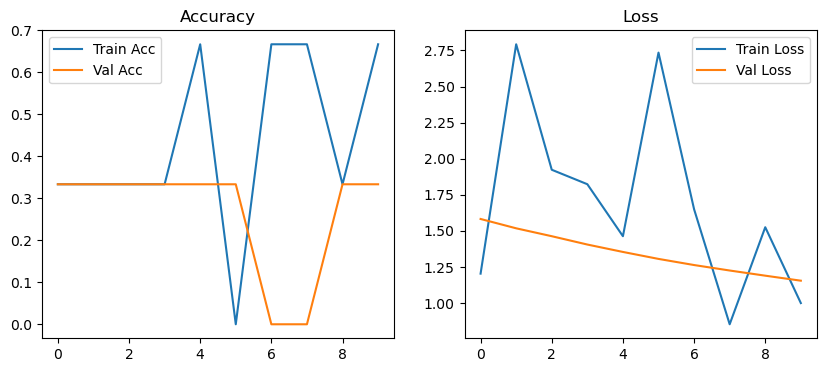

In [10]:
#MODEL -1 (DIRECT RECOGNITION)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ===========================
# Paths (change if needed)
# ===========================
train_dir = "E:/Biometrics/dataset/paired_split/train"
val_dir = "E:/Biometrics/dataset/paired_split/val"

# ===========================
# Data Generators
# ===========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# ===========================
# Build Model (Transfer Learning)
# ===========================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze convolutional base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# ===========================
# Train Model
# ===========================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# ===========================
# Save Model
# ===========================
model.save("direct_face_recognition.h5")
print("✅ Model saved as direct_face_recognition.h5")

# ===========================
# Plot Accuracy and Loss
# ===========================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [2]:
import os
import shutil
import random

# ==========================================
# USER SETTINGS
# ==========================================
input_base = "E:/Biometrics/dataset/paired"              # where your current folders are
output_base = "E:/Biometrics/dataset/paired_split"      # where you want to save split data

clean_dir = os.path.join(input_base, "clean")
occluded_dir = os.path.join(input_base, "occluded")

train_dir = os.path.join(output_base, "train")
val_dir = os.path.join(output_base, "val")

# ==========================================
# CREATE OUTPUT FOLDERS
# ==========================================
for folder in [train_dir, val_dir]:
    os.makedirs(os.path.join(folder, "clean"), exist_ok=True)
    os.makedirs(os.path.join(folder, "occluded"), exist_ok=True)

# ==========================================
# LOAD FILE NAMES
# ==========================================
clean_files = sorted(os.listdir(clean_dir))
occluded_files = sorted(os.listdir(occluded_dir))

print(f"Found {len(clean_files)} clean and {len(occluded_files)} occluded images.")

min_len = min(len(clean_files), len(occluded_files))
clean_files = clean_files[:min_len]
occluded_files = occluded_files[:min_len]

# Random 80/20 split
data_pairs = list(zip(clean_files, occluded_files))
random.shuffle(data_pairs)
split_index = int(0.8 * len(data_pairs))
train_pairs = data_pairs[:split_index]
val_pairs = data_pairs[split_index:]

# ==========================================
# COPY FILES
# ==========================================
def copy_pairs(pairs, dest_dir):
    for clean_file, occ_file in pairs:
        clean_src = os.path.join(clean_dir, clean_file)
        occ_src = os.path.join(occluded_dir, occ_file)

        if not os.path.exists(clean_src) or not os.path.exists(occ_src):
            print(f"⚠️ Skipping unmatched: {clean_file} or {occ_file}")
            continue

        shutil.copy(clean_src, os.path.join(dest_dir, "clean", clean_file))
        shutil.copy(occ_src, os.path.join(dest_dir, "occluded", occ_file))

copy_pairs(train_pairs, train_dir)
copy_pairs(val_pairs, val_dir)

# ==========================================
# SUMMARY
# ==========================================
print("\n✅ Split completed successfully!")
print(f"Train set: {len(train_pairs)} pairs")
print(f"Validation set: {len(val_pairs)} pairs")
print(f"Saved under: {output_base}/train and {output_base}/val")


Found 694 clean and 694 occluded images.

✅ Split completed successfully!
Train set: 555 pairs
Validation set: 139 pairs
Saved under: E:/Biometrics/dataset/paired_split/train and E:/Biometrics/dataset/paired_split/val


Train: (555, 128, 128, 3) (555, 128, 128, 3)
Val: (139, 128, 128, 3) (139, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


C:\Users\MSI-1\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

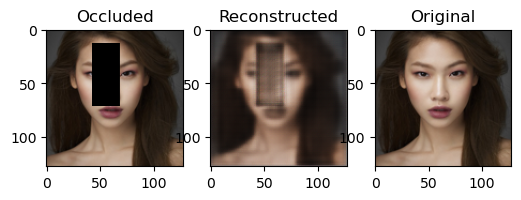

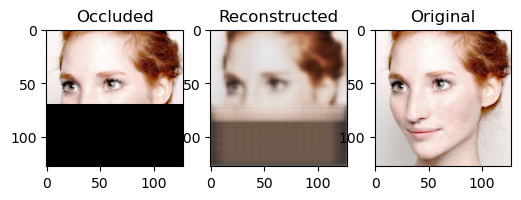

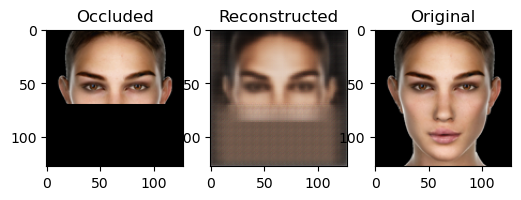

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

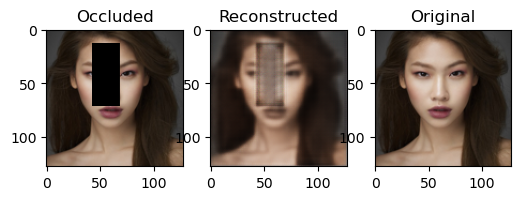

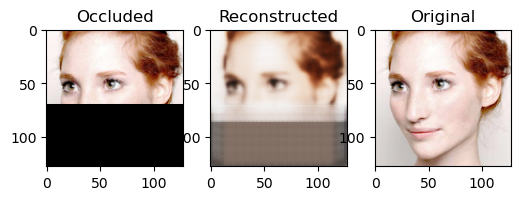

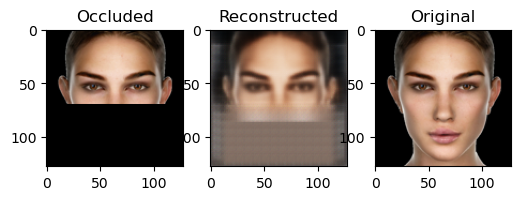

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━

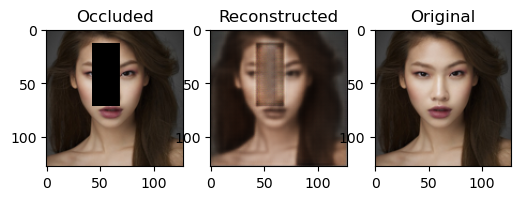

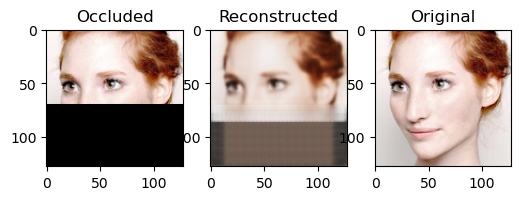

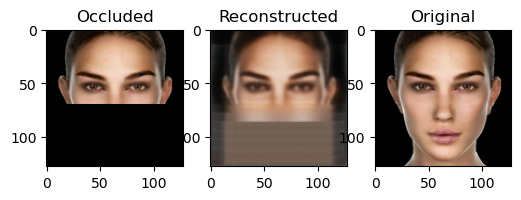

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

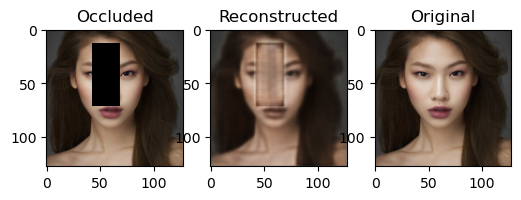

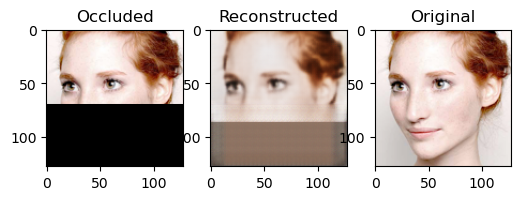

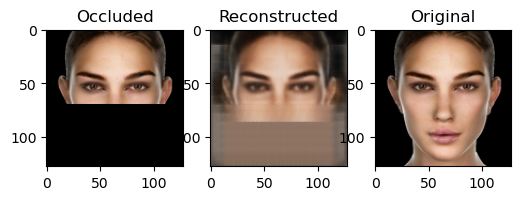

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

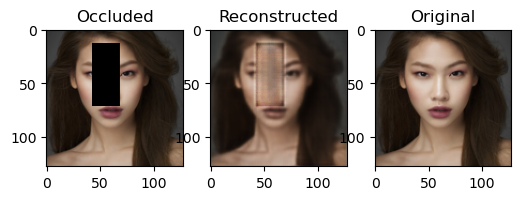

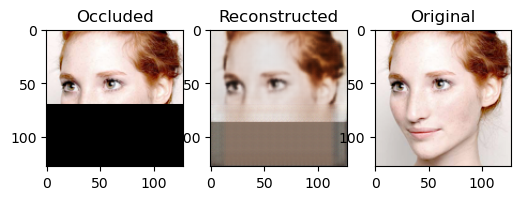

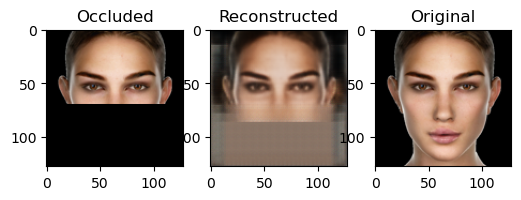

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

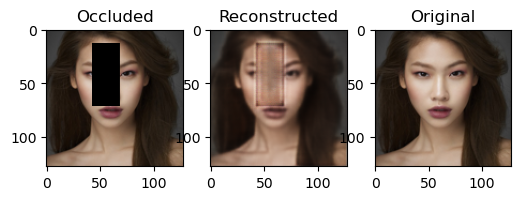

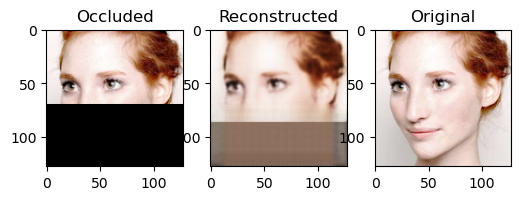

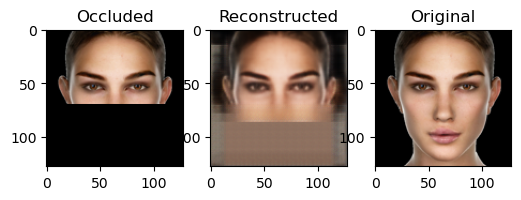

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

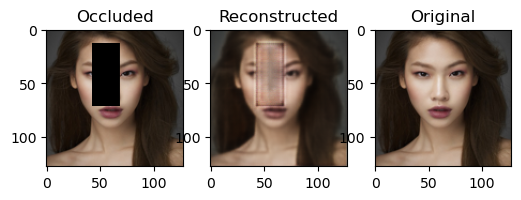

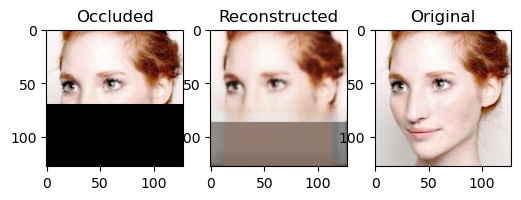

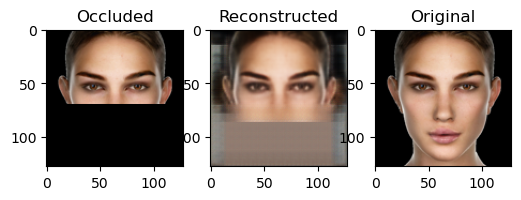

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

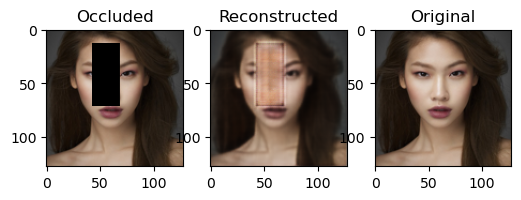

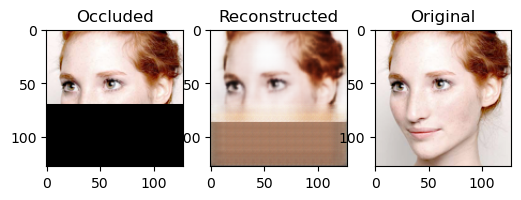

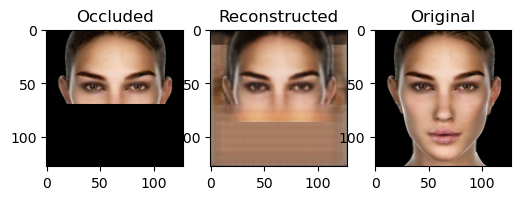

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

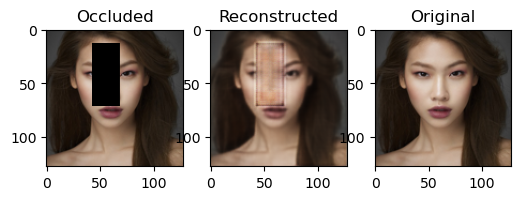

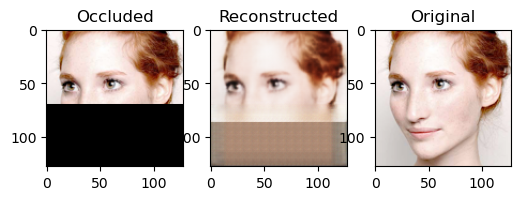

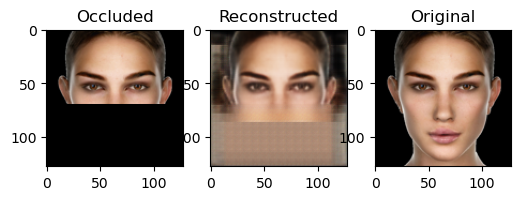

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

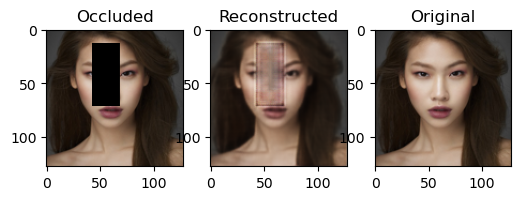

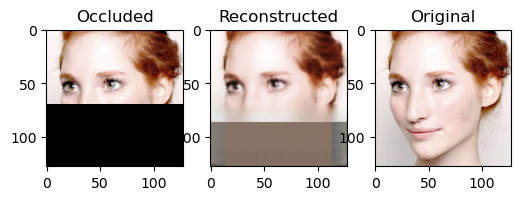

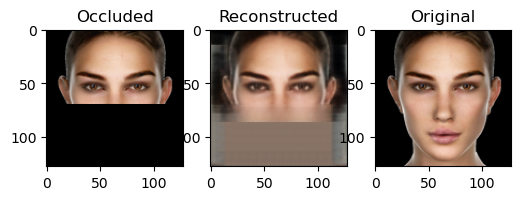

✅ GAN model saved as face_completion_gan.h5


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ==================================
# PATHS
# ==================================
train_clean_dir = "E:/Biometrics/dataset/paired_split/train/clean"
train_occ_dir   = "E:/Biometrics/dataset/paired_split/train/occluded"
val_clean_dir   = "E:/Biometrics/dataset/paired_split/val/clean"
val_occ_dir     = "E:/Biometrics/dataset/paired_split/val/occluded"
img_height, img_width = 128, 128

# ==================================
# LOAD DATA FUNCTION
# ==================================
def load_pairs(clean_dir, occ_dir, limit=None):
    clean_images, occ_images = [], []
    clean_files = sorted(os.listdir(clean_dir))
    occ_files = sorted(os.listdir(occ_dir))
    if limit:
        clean_files, occ_files = clean_files[:limit], occ_files[:limit]
    
    for c, o in zip(clean_files, occ_files):
        clean_path = os.path.join(clean_dir, c)
        occ_path = os.path.join(occ_dir, o)
        if not os.path.exists(clean_path) or not os.path.exists(occ_path):
            continue
        clean = image.load_img(clean_path, target_size=(img_height, img_width))
        occ = image.load_img(occ_path, target_size=(img_height, img_width))
        clean = image.img_to_array(clean) / 255.0
        occ = image.img_to_array(occ) / 255.0
        clean_images.append(clean)
        occ_images.append(occ)
    return np.array(occ_images), np.array(clean_images)

X_train_occ, X_train_clean = load_pairs(train_clean_dir, train_occ_dir)
X_val_occ, X_val_clean = load_pairs(val_clean_dir, val_occ_dir)

print("Train:", X_train_occ.shape, X_train_clean.shape)
print("Val:", X_val_occ.shape, X_val_clean.shape)

# ==================================
# GENERATOR (U-NET)
# ==================================
def build_generator():
    inputs = Input(shape=(img_height, img_width, 3))
    down1 = Conv2D(64, 4, strides=2, padding='same')(inputs)
    down1 = LeakyReLU(alpha=0.2)(down1)
    down2 = Conv2D(128, 4, strides=2, padding='same')(down1)
    down2 = LeakyReLU(alpha=0.2)(down2)
    bottleneck = Conv2D(256, 4, strides=2, padding='same')(down2)
    bottleneck = LeakyReLU(alpha=0.2)(bottleneck)
    up1 = Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu')(bottleneck)
    up1 = Concatenate()([up1, down2])
    up2 = Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu')(up1)
    up2 = Concatenate()([up2, down1])
    outputs = Conv2DTranspose(3, 4, strides=2, padding='same', activation='sigmoid')(up2)
    return Model(inputs, outputs, name='Generator')

generator = build_generator()

# ==================================
# DISCRIMINATOR
# ==================================
def build_discriminator():
    inp_img = Input(shape=(img_height, img_width, 3))
    target_img = Input(shape=(img_height, img_width, 3))
    x = Concatenate()([inp_img, target_img])
    x = Conv2D(64, 4, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, 4, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(1, 4, padding='same', activation='sigmoid')(x)
    return Model([inp_img, target_img], x, name='Discriminator')

discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# ==================================
# COMBINED MODEL (GAN)
# ==================================
discriminator.trainable = False
gan_input = Input(shape=(img_height, img_width, 3))
fake_img = generator(gan_input)
gan_output = discriminator([gan_input, fake_img])
gan = Model(gan_input, [gan_output, fake_img])
gan.compile(optimizer=Adam(0.0002, 0.5), loss=['binary_crossentropy', 'mae'], loss_weights=[1, 100])

# ==================================
# TRAINING LOOP
# ==================================
epochs = 100
batch_size = 8
steps_per_epoch = len(X_train_occ) // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        idx = np.random.randint(0, X_train_occ.shape[0], batch_size)
        real_occ, real_clean = X_train_occ[idx], X_train_clean[idx]

        fake_clean = generator.predict(real_occ)

        patch_shape = discriminator.output_shape[1:-1]
        real_labels = np.ones((batch_size, *patch_shape, 1))
        fake_labels = np.zeros((batch_size, *patch_shape, 1))


        d_loss_real = discriminator.train_on_batch([real_occ, real_clean], real_labels)
        d_loss_fake = discriminator.train_on_batch([real_occ, fake_clean], fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        g_loss = gan.train_on_batch(real_occ, [real_labels, real_clean])

    print(f"Epoch {epoch+1}/{epochs} - D loss: {d_loss:.4f} - G loss: {g_loss[0]:.4f}")

    if (epoch+1) % 10 == 0:
        sample = generator.predict(X_val_occ[:3])
        for i in range(3):
            plt.figure(figsize=(6,2))
            plt.subplot(1,3,1); plt.imshow(X_val_occ[i]); plt.title('Occluded')
            plt.subplot(1,3,2); plt.imshow(sample[i]); plt.title('Reconstructed')
            plt.subplot(1,3,3); plt.imshow(X_val_clean[i]); plt.title('Original')
            plt.show()

generator.save("face_completion_gan.h5")
print("✅ GAN model saved as face_completion_gan.h5")


In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.models import load_model

# Load your trained generator
generator = load_model("face_completion_gan.h5", compile=False)

# Input/output paths
input_path = "E:/Biometrics/dataset/paired_split/val/occluded"
output_path = "E:/Biometrics/dataset/paired_split/val/reconstructed"
os.makedirs(output_path, exist_ok=True)

# Generate clean faces from occluded
for filename in os.listdir(input_path):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    img_path = os.path.join(input_path, filename)
    img = load_img(img_path, target_size=(128, 128))   # use your actual input size
    img_array = img_to_array(img) / 127.5 - 1.0
    img_array = np.expand_dims(img_array, axis=0)

    gen_img = generator.predict(img_array)
    gen_img = 0.5 * gen_img + 0.5  # rescale back to [0,1]

    save_img(os.path.join(output_path, filename), gen_img[0])
    print(f"Saved reconstructed image: {filename}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Saved reconstructed image: 1 (103)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved reconstructed image: 1 (125)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Saved reconstructed image: 1 (128)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Saved reconstructed image: 1 (148)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved reconstructed image: 1 (17)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Saved reconstructed image: 1 (2103)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved reconstructed image: 1 (2112)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved reconstructed image: 1 (2121)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved reconstructed image: 1 (2122)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved reconstructed image: 1 (2123)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved reconstructed image: 1 (2131)_occ_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved reconstructed image: 1 (2134)_occ_0.pn

Found 1110 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer_20[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - accuracy: 0.6144 - loss: 0.8421 - val_accuracy: 0.6871 - val_loss: 0.6058
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.7396 - loss: 0.5811 - val_accuracy: 0.7410 - val_loss: 0.5214
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.8117 - loss: 0.4412 - val_accuracy: 0.7554 - val_loss: 0.4930
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.8189 - loss: 0.4088 - val_accuracy: 0.7338 - val_loss: 0.5212
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.8342 - loss: 0.4083 - val_accuracy: 0.7338 - val_loss: 0.5141
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8459 - loss: 0.3666 - val_accuracy: 0.7734 - val_loss: 0.4669
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.8495 - loss: 0.3621 - val_accuracy: 0.7410 - val_loss: 0.5207
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.8784 - loss: 0.3226 - val_accuracy: 0

✅ Model saved as direct_face_recognition.h5


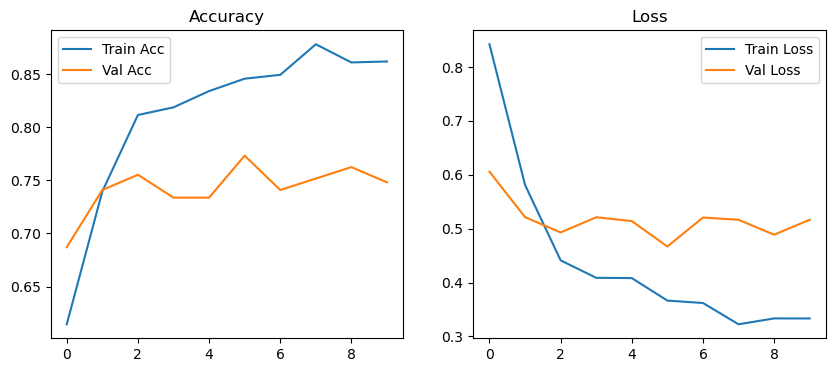

In [24]:
#MODEL -1 (DIRECT RECOGNITION AFTER ADDING RECONSTRUCTED FOLDER)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ===========================
# Paths (change if needed)
# ===========================
train_dir = "E:/Biometrics/dataset/paired_split/train"
val_dir = "E:/Biometrics/dataset/paired_split/val"

# ===========================
# Data Generators
# ===========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# ===========================
# Build Model (Transfer Learning)
# ===========================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze convolutional base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# FIX: Use the actual number of classes from the train generator
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# ===========================
# Train Model
# ===========================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# ===========================
# Save Model
# ===========================
model.save("direct_face_recognition.h5")
print("✅ Model saved as direct_face_recognition.h5")

# ===========================
# Plot Accuracy and Loss
# ===========================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

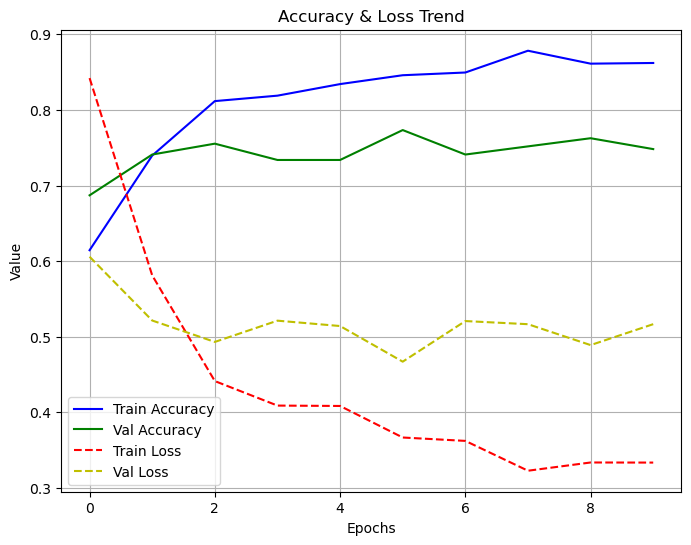

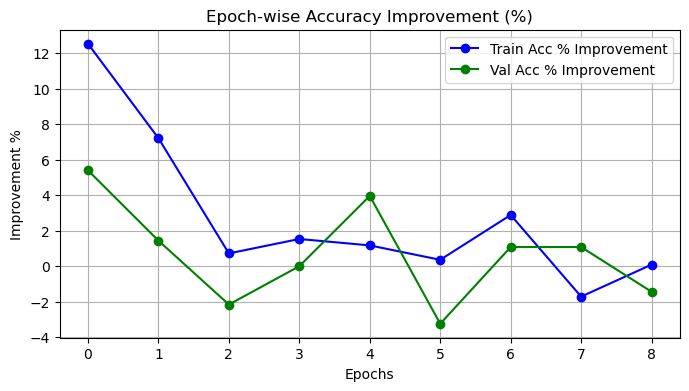

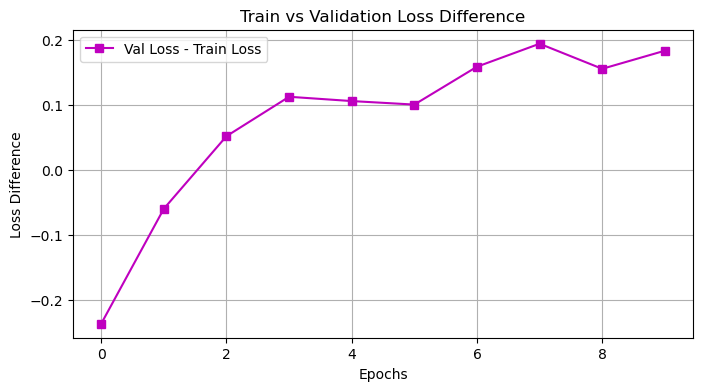

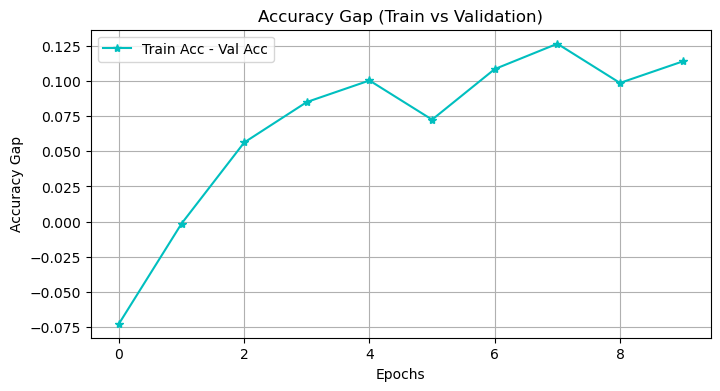

In [25]:
# ===========================
# Additional Plots for Analysis
# ===========================

import numpy as np

# 1. Accuracy vs Loss Combined Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'g-', label='Val Accuracy')
plt.plot(history.history['loss'], 'r--', label='Train Loss')
plt.plot(history.history['val_loss'], 'y--', label='Val Loss')
plt.title("Accuracy & Loss Trend")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# 2. Epoch-wise Accuracy Improvement %
train_acc_improve = np.diff(history.history['accuracy']) * 100
val_acc_improve = np.diff(history.history['val_accuracy']) * 100

plt.figure(figsize=(8,4))
plt.plot(train_acc_improve, 'b-o', label='Train Acc % Improvement')
plt.plot(val_acc_improve, 'g-o', label='Val Acc % Improvement')
plt.title("Epoch-wise Accuracy Improvement (%)")
plt.xlabel("Epochs")
plt.ylabel("Improvement %")
plt.legend()
plt.grid(True)
plt.show()

# 3. Loss Difference Between Train & Val
loss_diff = np.array(history.history['val_loss']) - np.array(history.history['loss'])
plt.figure(figsize=(8,4))
plt.plot(loss_diff, 'm-s', label='Val Loss - Train Loss')
plt.title("Train vs Validation Loss Difference")
plt.xlabel("Epochs")
plt.ylabel("Loss Difference")
plt.legend()
plt.grid(True)
plt.show()

# 4. Accuracy Gap Between Train & Validation
acc_gap = np.array(history.history['accuracy']) - np.array(history.history['val_accuracy'])
plt.figure(figsize=(8,4))
plt.plot(acc_gap, 'c-*', label='Train Acc - Val Acc')
plt.title("Accuracy Gap (Train vs Validation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Gap")
plt.legend()
plt.grid(True)
plt.show()


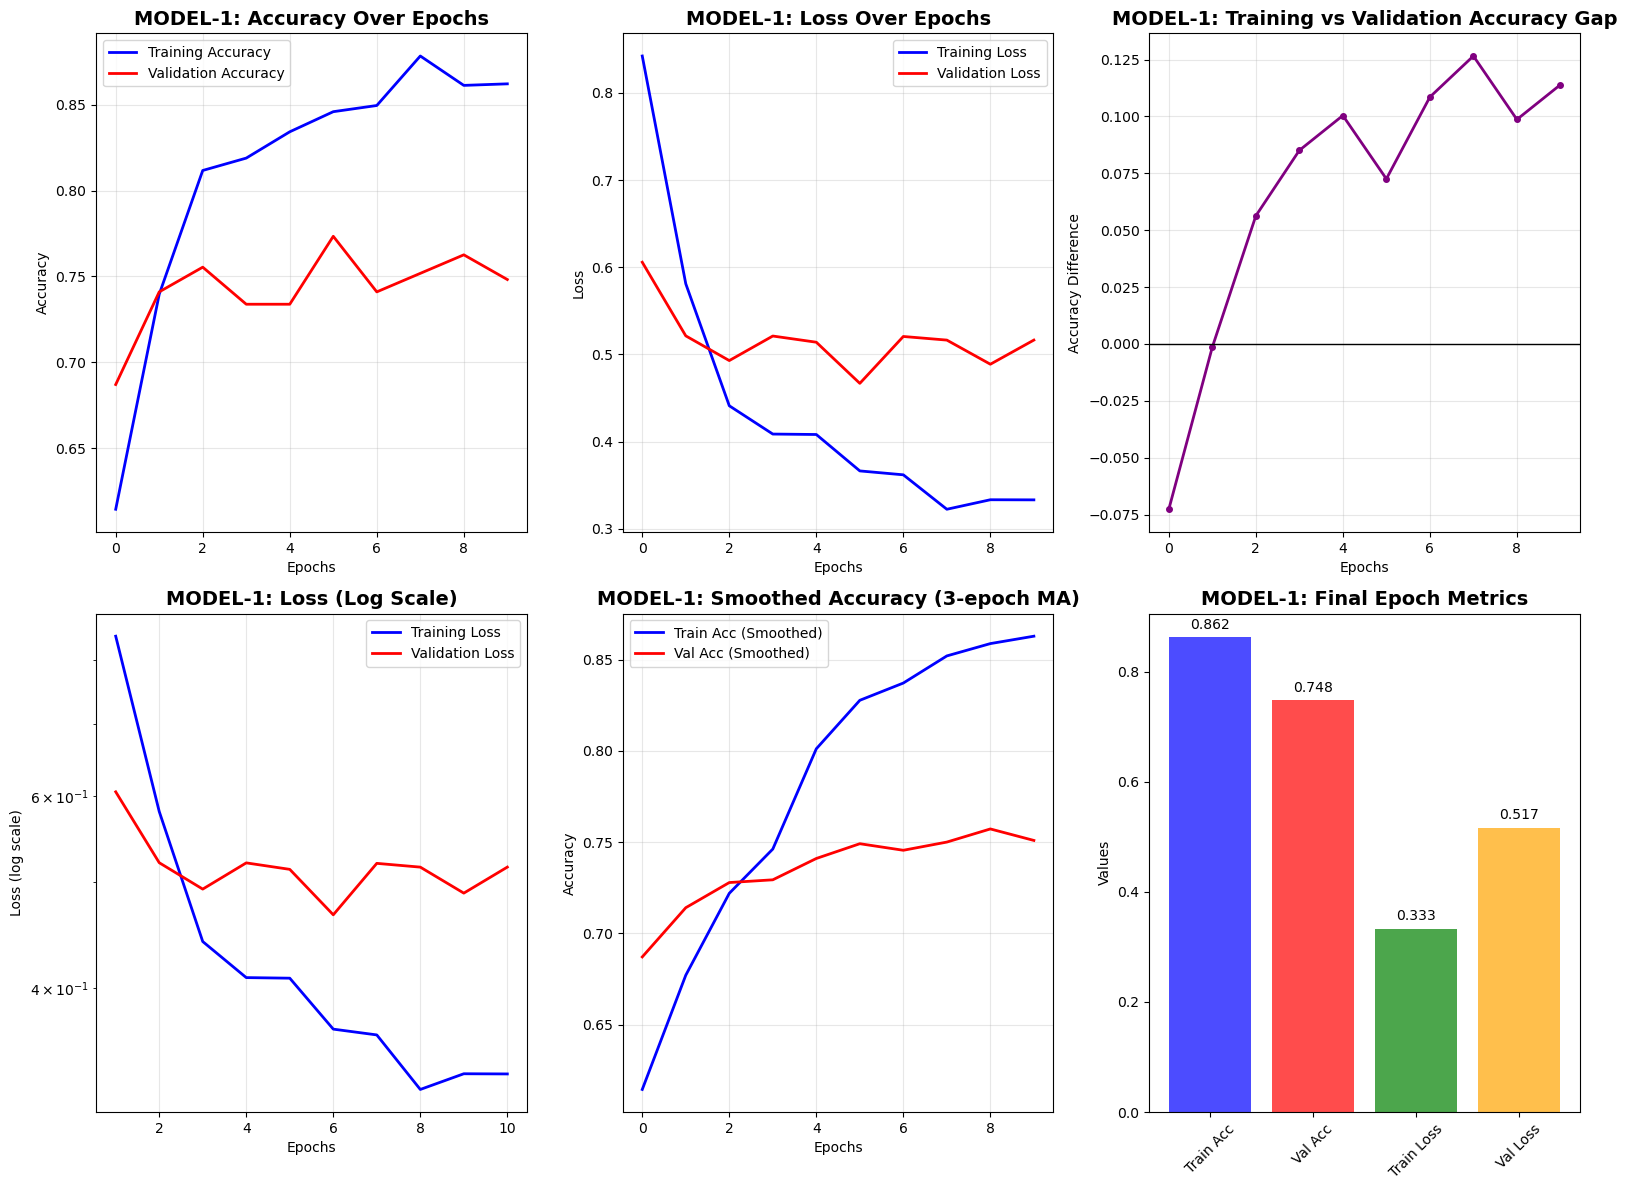

In [28]:
# Enhanced training history visualization for MODEL-1
plt.figure(figsize=(16, 12))

# 1. Accuracy plot
plt.subplot(2, 3, 1)
plt.plot(history.history['accuracy'], 'b-', linewidth=2, label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')
plt.title('MODEL-1: Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Loss plot
plt.subplot(2, 3, 2)
plt.plot(history.history['loss'], 'b-', linewidth=2, label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
plt.title('MODEL-1: Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Accuracy Difference
plt.subplot(2, 3, 3)
acc_diff = [history.history['accuracy'][i] - history.history['val_accuracy'][i] for i in range(len(history.history['accuracy']))]
plt.plot(acc_diff, 'purple', linewidth=2, marker='o', markersize=4)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.title('MODEL-1: Training vs Validation Accuracy Gap', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Difference')
plt.grid(True, alpha=0.3)

# 4. Learning rate effect (simulated)
plt.subplot(2, 3, 4)
epochs = range(1, len(history.history['accuracy']) + 1)
plt.semilogy(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss')
plt.semilogy(epochs, history.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
plt.title('MODEL-1: Loss (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Moving average of accuracy (smoothed)
plt.subplot(2, 3, 5)
window = 3
train_acc_smooth = [np.mean(history.history['accuracy'][max(0, i-window):i+1]) for i in range(len(history.history['accuracy']))]
val_acc_smooth = [np.mean(history.history['val_accuracy'][max(0, i-window):i+1]) for i in range(len(history.history['val_accuracy']))]
plt.plot(train_acc_smooth, 'b-', linewidth=2, label='Train Acc (Smoothed)')
plt.plot(val_acc_smooth, 'r-', linewidth=2, label='Val Acc (Smoothed)')
plt.title('MODEL-1: Smoothed Accuracy (3-epoch MA)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Final metrics comparison
plt.subplot(2, 3, 6)
final_metrics = {
    'Train Acc': history.history['accuracy'][-1],
    'Val Acc': history.history['val_accuracy'][-1],
    'Train Loss': history.history['loss'][-1],
    'Val Loss': history.history['val_loss'][-1]
}
colors = ['blue', 'red', 'green', 'orange']
plt.bar(final_metrics.keys(), final_metrics.values(), color=colors, alpha=0.7)
plt.title('MODEL-1: Final Epoch Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Values')
plt.xticks(rotation=45)
for i, (key, value) in enumerate(final_metrics.items()):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Train: (555, 128, 128, 3) (555, 128, 128, 3)
Val: (139, 128, 128, 3) (139, 128, 128, 3)


C:\Users\MSI-1\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\MSI-1\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/50 - D loss: 0.6937 - G loss: 16.0160
Epoch 2/50 - D loss: 0.6932 - G loss: 13.8783
Epoch 3/50 - D loss: 0.6930 - G loss: 13.0072
Epoch 4/50 - D loss: 0.6928 - G loss: 12.2237
Epoch 5/50 - D loss: 0.6928 - G loss: 11.7458
Epoch 6/50 - D loss: 0.6928 - G loss: 11.3425
Epoch 7/50 - D loss: 0.6928 - G loss: 11.0457
Epoch 8/50 - D loss: 0.6929 - G loss: 10.7491
Epoch 9/50 - D loss: 0.6931 - G loss: 10.5086
Epoch 10/50 - D loss: 0.6932 - G loss: 10.2995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


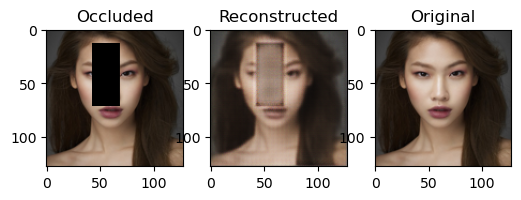

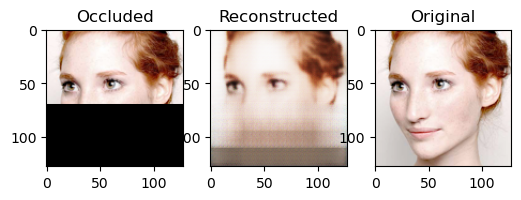

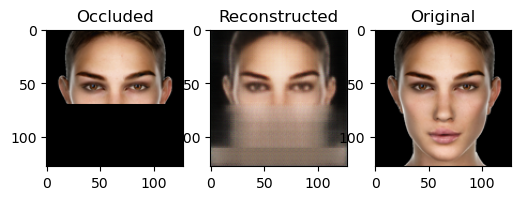

Epoch 11/50 - D loss: 0.6933 - G loss: 10.0920
Epoch 12/50 - D loss: 0.6934 - G loss: 9.8995
Epoch 13/50 - D loss: 0.6934 - G loss: 9.7574
Epoch 14/50 - D loss: 0.6935 - G loss: 9.5977
Epoch 15/50 - D loss: 0.6935 - G loss: 9.4794
Epoch 16/50 - D loss: 0.6936 - G loss: 9.3708
Epoch 17/50 - D loss: 0.6936 - G loss: 9.2717
Epoch 18/50 - D loss: 0.6937 - G loss: 9.1685
Epoch 19/50 - D loss: 0.6937 - G loss: 9.0529
Epoch 20/50 - D loss: 0.6937 - G loss: 8.9632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


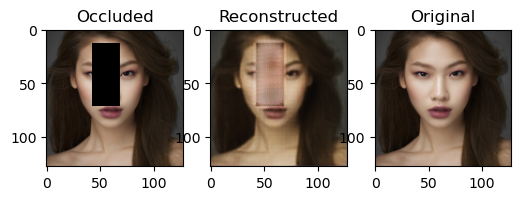

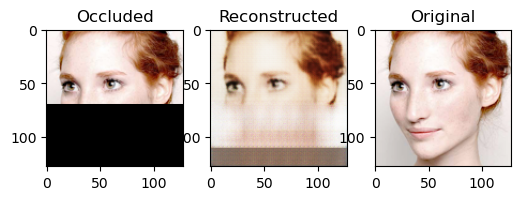

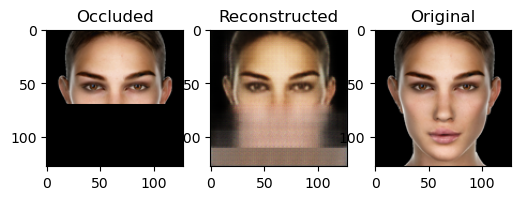

Epoch 21/50 - D loss: 0.6937 - G loss: 8.8756
Epoch 22/50 - D loss: 0.6938 - G loss: 8.7862
Epoch 23/50 - D loss: 0.6938 - G loss: 8.6922
Epoch 24/50 - D loss: 0.6938 - G loss: 8.6152
Epoch 25/50 - D loss: 0.6938 - G loss: 8.5260
Epoch 26/50 - D loss: 0.6939 - G loss: 8.4539
Epoch 27/50 - D loss: 0.6939 - G loss: 8.3784
Epoch 28/50 - D loss: 0.6939 - G loss: 8.3080
Epoch 29/50 - D loss: 0.6939 - G loss: 8.2465
Epoch 30/50 - D loss: 0.6939 - G loss: 8.1931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


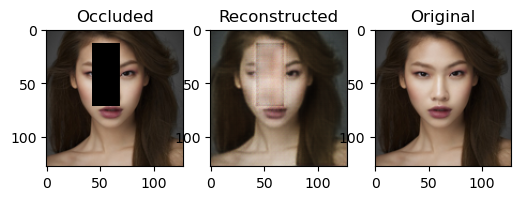

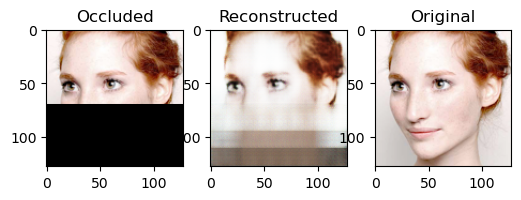

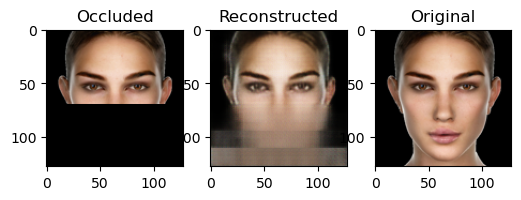

Epoch 31/50 - D loss: 0.6939 - G loss: 8.1364
Epoch 32/50 - D loss: 0.6939 - G loss: 8.0829
Epoch 33/50 - D loss: 0.6939 - G loss: 8.0275
Epoch 34/50 - D loss: 0.6939 - G loss: 7.9753
Epoch 35/50 - D loss: 0.6939 - G loss: 7.9300
Epoch 36/50 - D loss: 0.6940 - G loss: 7.8797
Epoch 37/50 - D loss: 0.6940 - G loss: 7.8388
Epoch 38/50 - D loss: 0.6940 - G loss: 7.7840
Epoch 39/50 - D loss: 0.6940 - G loss: 7.7345
Epoch 40/50 - D loss: 0.6940 - G loss: 7.6880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


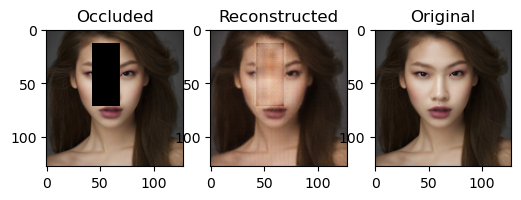

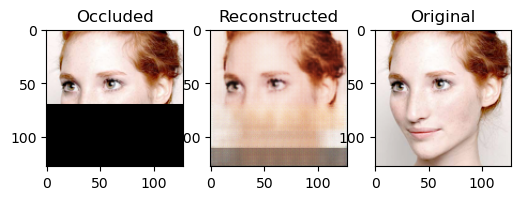

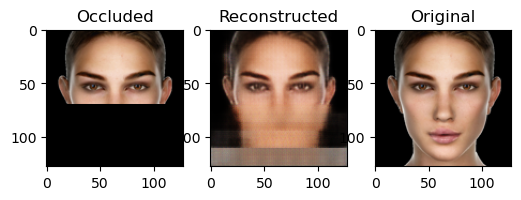

Epoch 41/50 - D loss: 0.6940 - G loss: 7.6440
Epoch 42/50 - D loss: 0.6940 - G loss: 7.6024
Epoch 43/50 - D loss: 0.6940 - G loss: 7.5682
Epoch 44/50 - D loss: 0.6940 - G loss: 7.5240
Epoch 45/50 - D loss: 0.6940 - G loss: 7.4875
Epoch 46/50 - D loss: 0.6940 - G loss: 7.4490
Epoch 47/50 - D loss: 0.6940 - G loss: 7.4160
Epoch 48/50 - D loss: 0.6940 - G loss: 7.3793
Epoch 49/50 - D loss: 0.6940 - G loss: 7.3407
Epoch 50/50 - D loss: 0.6940 - G loss: 7.3044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


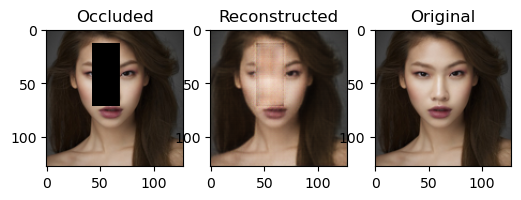

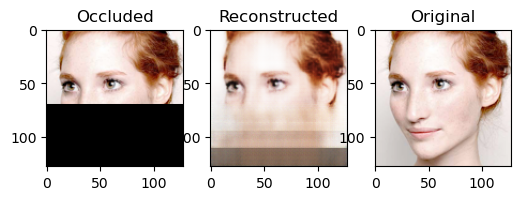

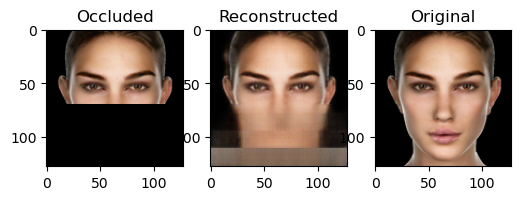

✅ GAN model saved as face_completion_gan_batchnorm.keras


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ==================================
# PATHS
# ==================================
train_clean_dir = "E:/Biometrics/dataset/paired_split/train/clean"
train_occ_dir   = "E:/Biometrics/dataset/paired_split/train/occluded"
val_clean_dir   = "E:/Biometrics/dataset/paired_split/val/clean"
val_occ_dir     = "E:/Biometrics/dataset/paired_split/val/occluded"
img_height, img_width = 128, 128

# ==================================
# LOAD DATA FUNCTION
# ==================================
def load_pairs(clean_dir, occ_dir, limit=None):
    clean_images, occ_images = [], []
    clean_files = sorted(os.listdir(clean_dir))
    occ_files = sorted(os.listdir(occ_dir))
    if limit:
        clean_files, occ_files = clean_files[:limit], occ_files[:limit]
    
    for c, o in zip(clean_files, occ_files):
        clean_path = os.path.join(clean_dir, c)
        occ_path = os.path.join(occ_dir, o)
        if not os.path.exists(clean_path) or not os.path.exists(occ_path):
            continue
        clean = image.load_img(clean_path, target_size=(img_height, img_width))
        occ = image.load_img(occ_path, target_size=(img_height, img_width))
        clean = image.img_to_array(clean) / 255.0
        occ = image.img_to_array(occ) / 255.0
        clean_images.append(clean)
        occ_images.append(occ)
    return np.array(occ_images), np.array(clean_images)

X_train_occ, X_train_clean = load_pairs(train_clean_dir, train_occ_dir)
X_val_occ, X_val_clean = load_pairs(val_clean_dir, val_occ_dir)

print("Train:", X_train_occ.shape, X_train_clean.shape)
print("Val:", X_val_occ.shape, X_val_clean.shape)

# ==================================
# GENERATOR (U-NET with BatchNorm)
# ==================================
def build_generator():
    inputs = Input(shape=(img_height, img_width, 3))
    
    # Encoder
    d1 = Conv2D(64, 4, strides=2, padding='same')(inputs)
    d1 = LeakyReLU(alpha=0.2)(d1)
    d2 = Conv2D(128, 4, strides=2, padding='same')(d1)
    d2 = BatchNormalization()(d2)
    d2 = LeakyReLU(alpha=0.2)(d2)
    d3 = Conv2D(256, 4, strides=2, padding='same')(d2)
    d3 = BatchNormalization()(d3)
    d3 = LeakyReLU(alpha=0.2)(d3)

    # Bottleneck
    bottleneck = Conv2D(512, 4, strides=2, padding='same')(d3)
    bottleneck = LeakyReLU(alpha=0.2)(bottleneck)

    # Decoder
    u1 = Conv2DTranspose(256, 4, strides=2, padding='same', activation='relu')(bottleneck)
    u1 = Concatenate()([u1, d3])
    u2 = Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu')(u1)
    u2 = Concatenate()([u2, d2])
    u3 = Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu')(u2)
    u3 = Concatenate()([u3, d1])

    outputs = Conv2DTranspose(3, 4, strides=2, padding='same', activation='sigmoid')(u3)
    return Model(inputs, outputs, name='Generator')

generator = build_generator()

# ==================================
# DISCRIMINATOR
# ==================================
def build_discriminator():
    inp_img = Input(shape=(img_height, img_width, 3))
    target_img = Input(shape=(img_height, img_width, 3))
    x = Concatenate()([inp_img, target_img])
    x = Conv2D(64, 4, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(256, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(1, 4, padding='same', activation='sigmoid')(x)
    return Model([inp_img, target_img], x, name='Discriminator')

discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# ==================================
# COMBINED MODEL (GAN)
# ==================================
discriminator.trainable = False
gan_input = Input(shape=(img_height, img_width, 3))
fake_img = generator(gan_input)
gan_output = discriminator([gan_input, fake_img])
gan = Model(gan_input, [gan_output, fake_img])
gan.compile(optimizer=Adam(0.0002, 0.5), loss=['binary_crossentropy', 'mae'], loss_weights=[1, 100])

# ==================================
# TRAINING LOOP
# ==================================
epochs = 50
batch_size = 8
steps_per_epoch = len(X_train_occ) // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        idx = np.random.randint(0, X_train_occ.shape[0], batch_size)
        real_occ, real_clean = X_train_occ[idx], X_train_clean[idx]
        fake_clean = generator.predict(real_occ, verbose=0)

        patch_shape = discriminator.output_shape[1:-1]
        real_labels = np.ones((batch_size, *patch_shape, 1))
        fake_labels = np.zeros((batch_size, *patch_shape, 1))

        d_loss_real = discriminator.train_on_batch([real_occ, real_clean], real_labels)
        d_loss_fake = discriminator.train_on_batch([real_occ, fake_clean], fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        g_loss = gan.train_on_batch(real_occ, [real_labels, real_clean])

    print(f"Epoch {epoch+1}/{epochs} - D loss: {d_loss:.4f} - G loss: {g_loss[0]:.4f}")

    if (epoch+1) % 10 == 0:
        sample = generator.predict(X_val_occ[:3])
        for i in range(3):
            plt.figure(figsize=(6,2))
            plt.subplot(1,3,1); plt.imshow(X_val_occ[i]); plt.title('Occluded')
            plt.subplot(1,3,2); plt.imshow(sample[i]); plt.title('Reconstructed')
            plt.subplot(1,3,3); plt.imshow(X_val_clean[i]); plt.title('Original')
            plt.show()

generator.save("face_completion_gan_batchnorm.keras")
print("✅ GAN model saved as face_completion_gan_batchnorm.keras")


Train: (555, 128, 128, 3) (555, 128, 128, 3)
Val: (139, 128, 128, 3) (139, 128, 128, 3)
Epoch 1/100 - D loss: 0.6941 - G loss: 132.9666
Epoch 2/100 - D loss: 0.6941 - G loss: 111.4011
Epoch 3/100 - D loss: 0.6941 - G loss: 100.3999
Epoch 4/100 - D loss: 0.6941 - G loss: 93.2886
Epoch 5/100 - D loss: 0.6940 - G loss: 87.6601
Epoch 6/100 - D loss: 0.6939 - G loss: 83.7109
Epoch 7/100 - D loss: 0.6939 - G loss: 80.2948
Epoch 8/100 - D loss: 0.6939 - G loss: 77.2066
Epoch 9/100 - D loss: 0.6939 - G loss: 74.5603
Epoch 10/100 - D loss: 0.6940 - G loss: 72.1436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


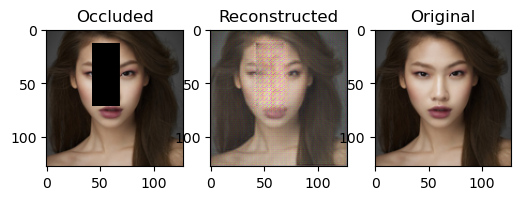

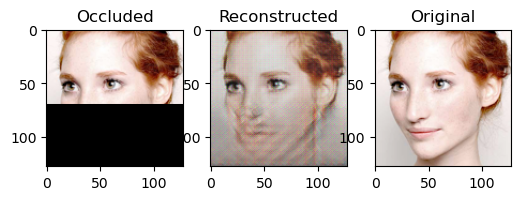

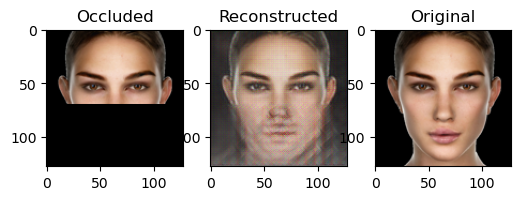

✅ Model saved after Epoch 10
Epoch 11/100 - D loss: 0.6940 - G loss: 70.0077
Epoch 12/100 - D loss: 0.6941 - G loss: 67.9944
Epoch 13/100 - D loss: 0.6941 - G loss: 66.1108
Epoch 14/100 - D loss: 0.6941 - G loss: 64.4846
Epoch 15/100 - D loss: 0.6941 - G loss: 62.9555
Epoch 16/100 - D loss: 0.6942 - G loss: 61.5359
Epoch 17/100 - D loss: 0.6942 - G loss: 60.2785
Epoch 18/100 - D loss: 0.6942 - G loss: 58.9402
Epoch 19/100 - D loss: 0.6942 - G loss: 57.7808
Epoch 20/100 - D loss: 0.6942 - G loss: 56.6822
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


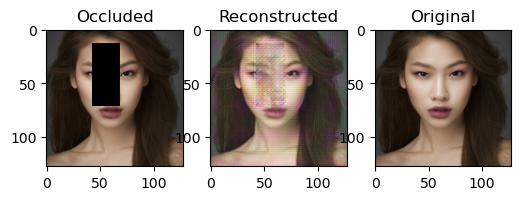

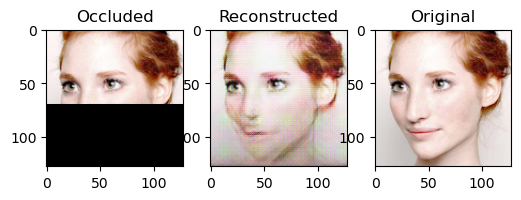

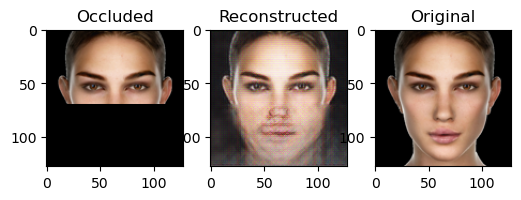

✅ Model saved after Epoch 20
Epoch 21/100 - D loss: 0.6942 - G loss: 55.6413
Epoch 22/100 - D loss: 0.6942 - G loss: 54.6548
Epoch 23/100 - D loss: 0.6942 - G loss: 53.7445
Epoch 24/100 - D loss: 0.6942 - G loss: 52.8950
Epoch 25/100 - D loss: 0.6942 - G loss: 52.0260
Epoch 26/100 - D loss: 0.6942 - G loss: 51.2153
Epoch 27/100 - D loss: 0.6942 - G loss: 50.4203
Epoch 28/100 - D loss: 0.6942 - G loss: 49.6556
Epoch 29/100 - D loss: 0.6942 - G loss: 48.9270
Epoch 30/100 - D loss: 0.6942 - G loss: 48.2058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


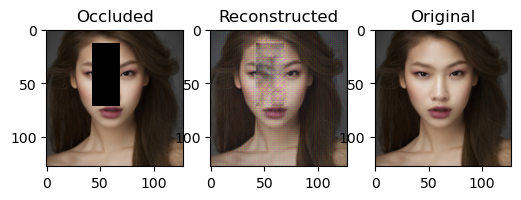

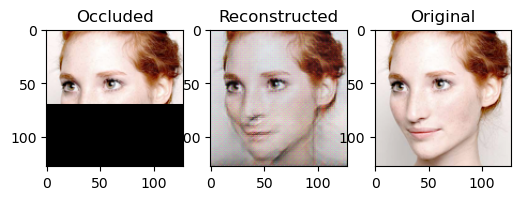

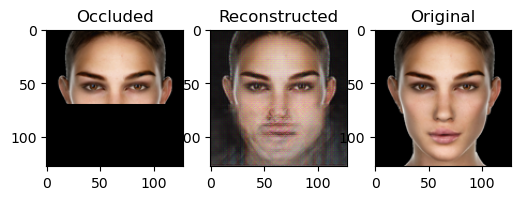

✅ Model saved after Epoch 30
Epoch 31/100 - D loss: 0.6942 - G loss: 47.5378
Epoch 32/100 - D loss: 0.6942 - G loss: 46.9296
Epoch 33/100 - D loss: 0.6941 - G loss: 46.3217
Epoch 34/100 - D loss: 0.6941 - G loss: 45.7030
Epoch 35/100 - D loss: 0.6941 - G loss: 45.1024
Epoch 36/100 - D loss: 0.6941 - G loss: 44.5267
Epoch 37/100 - D loss: 0.6941 - G loss: 43.9997
Epoch 38/100 - D loss: 0.6941 - G loss: 43.4748
Epoch 39/100 - D loss: 0.6941 - G loss: 42.9811
Epoch 40/100 - D loss: 0.6941 - G loss: 42.5032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


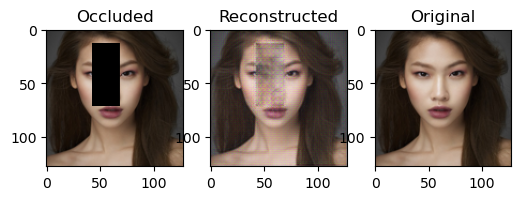

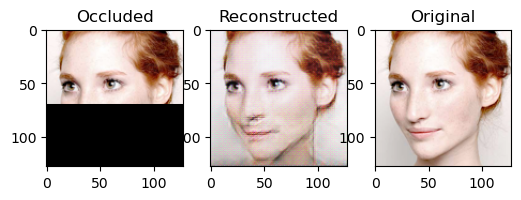

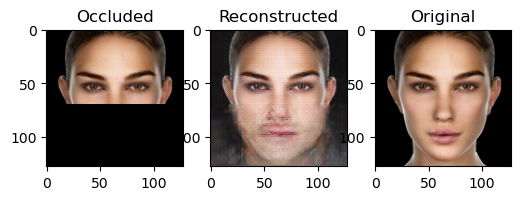

✅ Model saved after Epoch 40
Epoch 41/100 - D loss: 0.6941 - G loss: 42.0428
Epoch 42/100 - D loss: 0.6941 - G loss: 41.5883
Epoch 43/100 - D loss: 0.6941 - G loss: 41.1447
Epoch 44/100 - D loss: 0.6941 - G loss: 40.7096
Epoch 45/100 - D loss: 0.6941 - G loss: 40.3008
Epoch 46/100 - D loss: 0.6941 - G loss: 39.8970
Epoch 47/100 - D loss: 0.6941 - G loss: 39.5117
Epoch 48/100 - D loss: 0.6941 - G loss: 39.1299
Epoch 49/100 - D loss: 0.6941 - G loss: 38.7577
Epoch 50/100 - D loss: 0.6941 - G loss: 38.4170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


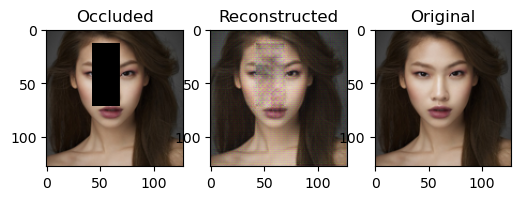

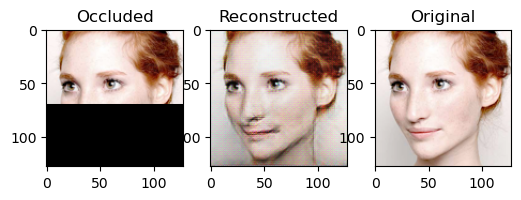

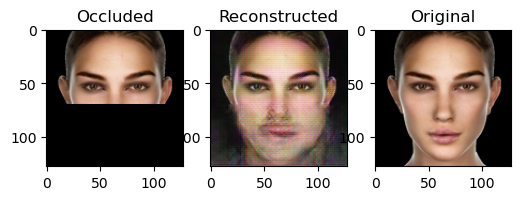

✅ Model saved after Epoch 50
Epoch 51/100 - D loss: 0.6941 - G loss: 38.0689
Epoch 52/100 - D loss: 0.6941 - G loss: 37.7327
Epoch 53/100 - D loss: 0.6941 - G loss: 37.3989
Epoch 54/100 - D loss: 0.6941 - G loss: 37.0741
Epoch 55/100 - D loss: 0.6941 - G loss: 36.7596
Epoch 56/100 - D loss: 0.6941 - G loss: 36.4496
Epoch 57/100 - D loss: 0.6941 - G loss: 36.1479
Epoch 58/100 - D loss: 0.6940 - G loss: 35.8569
Epoch 59/100 - D loss: 0.6940 - G loss: 35.5751
Epoch 60/100 - D loss: 0.6940 - G loss: 35.2958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


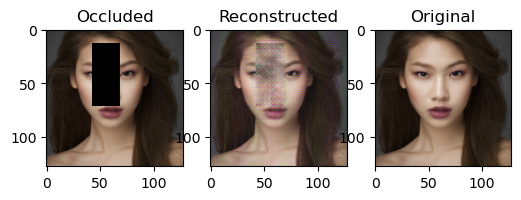

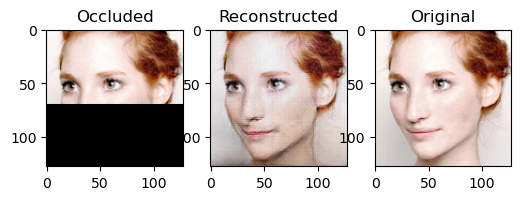

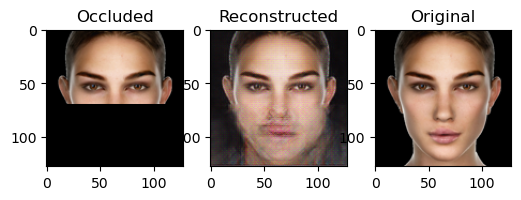

✅ Model saved after Epoch 60
Epoch 61/100 - D loss: 0.6940 - G loss: 35.0193
Epoch 62/100 - D loss: 0.6940 - G loss: 34.7639


KeyboardInterrupt: 

In [5]:
# ================================================================
# ENHANCED FACE COMPLETION GAN (No keras.src / addons dependencies)
# ================================================================

import os
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Concatenate,
    BatchNormalization, GaussianNoise, GlobalAveragePooling2D, Dense
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19

# ================================================================
# PATHS
# ================================================================
train_clean_dir = "E:/Biometrics/dataset/paired_split/train/clean"
train_occ_dir   = "E:/Biometrics/dataset/paired_split/train/occluded"
val_clean_dir   = "E:/Biometrics/dataset/paired_split/val/clean"
val_occ_dir     = "E:/Biometrics/dataset/paired_split/val/occluded"
img_height, img_width = 128, 128

# ================================================================
# LOAD DATA FUNCTION
# ================================================================
def load_pairs(clean_dir, occ_dir, limit=None):
    clean_images, occ_images = [], []
    clean_files = sorted(os.listdir(clean_dir))
    occ_files = sorted(os.listdir(occ_dir))
    if limit:
        clean_files, occ_files = clean_files[:limit], occ_files[:limit]
    for c, o in zip(clean_files, occ_files):
        clean_path = os.path.join(clean_dir, c)
        occ_path = os.path.join(occ_dir, o)
        if not os.path.exists(clean_path) or not os.path.exists(occ_path):
            continue
        clean = image.load_img(clean_path, target_size=(img_height, img_width))
        occ = image.load_img(occ_path, target_size=(img_height, img_width))
        clean = image.img_to_array(clean) / 255.0
        occ = image.img_to_array(occ) / 255.0
        clean_images.append(clean)
        occ_images.append(occ)
    return np.array(occ_images), np.array(clean_images)

X_train_occ, X_train_clean = load_pairs(train_clean_dir, train_occ_dir)
X_val_occ, X_val_clean = load_pairs(val_clean_dir, val_occ_dir)

print("Train:", X_train_occ.shape, X_train_clean.shape)
print("Val:", X_val_occ.shape, X_val_clean.shape)

# ================================================================
# PERCEPTUAL LOSS USING VGG19 FEATURES
# ================================================================
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(128,128,3))
vgg.trainable = False
feature_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer("block3_conv3").output)

def perceptual_loss(y_true, y_pred):
    y_true_features = feature_extractor(y_true)
    y_pred_features = feature_extractor(y_pred)
    return tf.reduce_mean(tf.abs(y_true_features - y_pred_features))

# ================================================================
# GENERATOR (U-NET)
# ================================================================
def build_generator():
    inputs = Input(shape=(img_height, img_width, 3))

    # Encoder
    d1 = Conv2D(64, 4, strides=2, padding='same')(inputs)
    d1 = LeakyReLU(alpha=0.2)(d1)
    d2 = Conv2D(128, 4, strides=2, padding='same')(d1)
    d2 = BatchNormalization()(d2)
    d2 = LeakyReLU(alpha=0.2)(d2)
    d3 = Conv2D(256, 4, strides=2, padding='same')(d2)
    d3 = BatchNormalization()(d3)
    d3 = LeakyReLU(alpha=0.2)(d3)
    d4 = Conv2D(512, 4, strides=2, padding='same')(d3)
    d4 = BatchNormalization()(d4)
    d4 = LeakyReLU(alpha=0.2)(d4)

    # Bottleneck
    b = Conv2D(512, 4, strides=2, padding='same')(d4)
    b = LeakyReLU(alpha=0.2)(b)

    # Decoder
    u1 = Conv2DTranspose(512, 4, strides=2, padding='same', activation='relu')(b)
    u1 = Concatenate()([u1, d4])
    u2 = Conv2DTranspose(256, 4, strides=2, padding='same', activation='relu')(u1)
    u2 = Concatenate()([u2, d3])
    u3 = Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu')(u2)
    u3 = Concatenate()([u3, d2])
    u4 = Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu')(u3)
    u4 = Concatenate()([u4, d1])

    outputs = Conv2DTranspose(3, 4, strides=2, padding='same', activation='sigmoid')(u4)
    return Model(inputs, outputs, name='Generator')

generator = build_generator()

# ================================================================
# DISCRIMINATOR (PatchGAN + Gaussian Noise + Feature Matching)
# ================================================================
def build_discriminator():
    inp_img = Input(shape=(img_height, img_width, 3))
    target_img = Input(shape=(img_height, img_width, 3))
    x = Concatenate()([inp_img, target_img])
    x = GaussianNoise(0.05)(x)
    x = Conv2D(64, 4, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(256, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(512, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = GlobalAveragePooling2D()(x)
    out = Dense(1, activation='sigmoid')(x)
    return Model([inp_img, target_img], out, name='Discriminator')

discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# ================================================================
# COMBINED GAN MODEL
# ================================================================
discriminator.trainable = False
gan_input = Input(shape=(img_height, img_width, 3))
fake_img = generator(gan_input)
gan_output = discriminator([gan_input, fake_img])
gan = Model(gan_input, [gan_output, fake_img])
gan.compile(optimizer=Adam(0.0002, 0.5), loss=['binary_crossentropy', perceptual_loss], loss_weights=[1, 50])

# ================================================================
# TRAINING LOOP WITH IMPROVED VISUAL FEEDBACK
# ================================================================
epochs = 100
batch_size = 8
steps_per_epoch = len(X_train_occ) // batch_size
save_interval = 10

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        idx = np.random.randint(0, X_train_occ.shape[0], batch_size)
        real_occ, real_clean = X_train_occ[idx], X_train_clean[idx]
        fake_clean = generator.predict(real_occ, verbose=0)

        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        # Train discriminator
        d_loss_real = discriminator.train_on_batch([real_occ, real_clean], valid)
        d_loss_fake = discriminator.train_on_batch([real_occ, fake_clean], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator (adversarial + perceptual)
        g_loss = gan.train_on_batch(real_occ, [valid, real_clean])

    print(f"Epoch {epoch+1}/{epochs} - D loss: {d_loss:.4f} - G loss: {g_loss[0]:.4f}")

    # =========================================================
    # SAVE SAMPLE OUTPUTS
    # =========================================================
    if (epoch + 1) % save_interval == 0:
        sample = generator.predict(X_val_occ[:3])
        for i in range(3):
            plt.figure(figsize=(6,2))
            plt.subplot(1,3,1); plt.imshow(X_val_occ[i]); plt.title('Occluded')
            plt.subplot(1,3,2); plt.imshow(sample[i]); plt.title('Reconstructed')
            plt.subplot(1,3,3); plt.imshow(X_val_clean[i]); plt.title('Original')
            plt.show()

        generator.save(f"face_completion_gan_enhanced_epoch{epoch+1}.keras")
        print(f"✅ Model saved after Epoch {epoch+1}")

print("🎉 Training Completed! Final model saved as face_completion_gan_enhanced_final.keras")
generator.save("face_completion_gan_enhanced_final.keras")
